<a href="https://colab.research.google.com/github/sephora-codes/Bitcoin-Price-Prediction-Using-LSTM/blob/main/Bitcoin_Today_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import io
import pandas_datareader as web
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [ ]:
from google.colab import files


uploaded = files.upload()

Saving BTC-USD.csv to BTC-USD.csv


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['BTC-USD.csv']))
#print(data2)
df= df.sort_values('Date')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-05-21,2067.030029,2119.080078,2037.500000,2041.199951,2041.199951,1147859968
1,2017-05-22,2043.189941,2303.899902,2017.869995,2173.399902,2173.399902,1942220032
2,2017-05-23,2191.560059,2320.820068,2178.500000,2320.419922,2320.419922,1378749952
3,2017-05-24,2321.370117,2523.719971,2321.370117,2443.639893,2443.639893,1725379968
4,2017-05-25,2446.239990,2763.709961,2285.300049,2304.979980,2304.979980,2406700032


In [ ]:
df.shape

(2192, 7)

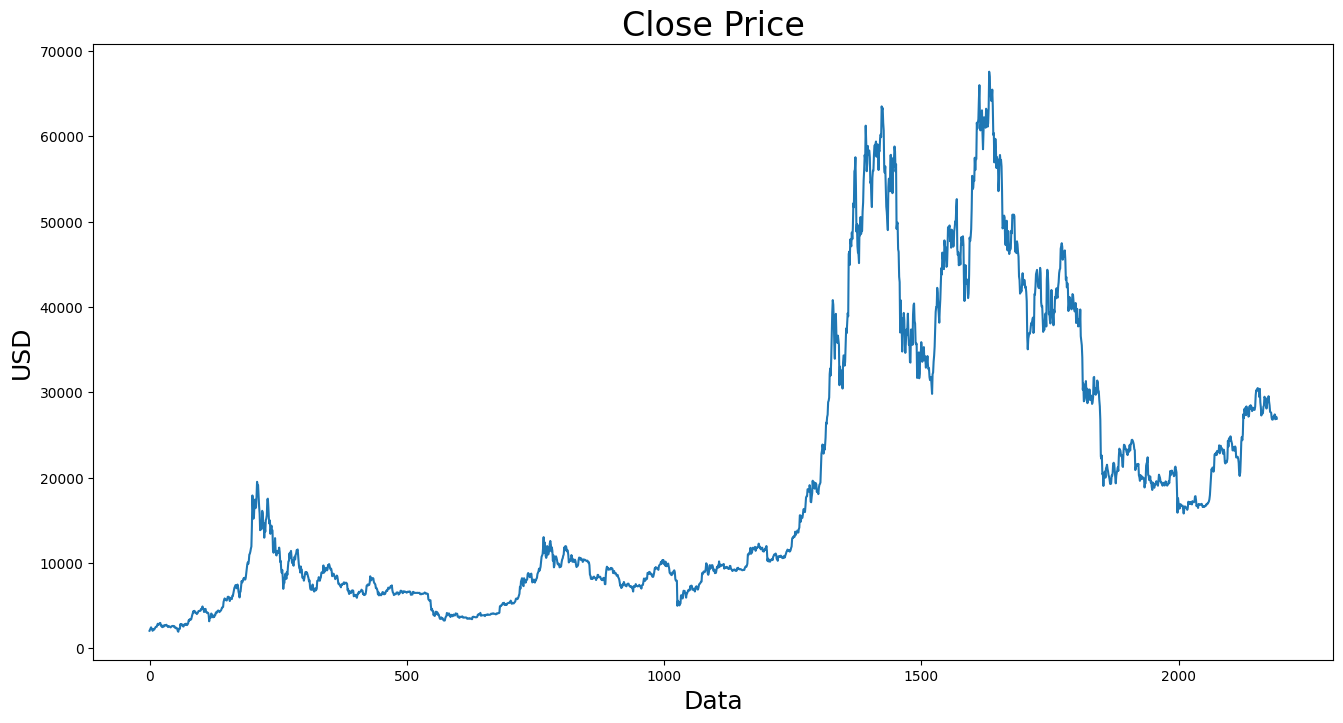

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Close Price', fontsize=24)
plt.plot(df['Close'])
plt.xlabel('Data', fontsize=18)
plt.ylabel('USD', fontsize=18)
plt.show()

In [ ]:
#Creat a new dataframe with only Close Price
data = df.filter(['Close'])
#Convert the dataframe to numpy array
dataset = data.values
# Get the number of rows to train the model on. we need this number to create our train and test sets
# math.ceil will round up the number
training_data_len = math.ceil(len(dataset) * .8) # We are using %80 of the data for training
training_data_len

1754

In [ ]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.00169691],
       [0.00371102],
       [0.00595091],
       ...,
       [0.38027798],
       [0.38392618],
       [0.38045054]])

In [ ]:
# Creat the training dataset
train_data = scaled_data[0:training_data_len, :]
# Split the data into X_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60: i, 0])
  y_train.append(train_data[i, 0])


  if i <= 60:
    print(x_train)
    print(y_train)
    print()

[array([0.00169691, 0.00371102, 0.00595091, 0.0078282 , 0.00571568,
       0.00415314, 0.00166141, 0.00344288, 0.00496351, 0.00374255,
       0.00543276, 0.00728339, 0.00851242, 0.00892073, 0.0088668 ,
       0.01153298, 0.01422033, 0.0122239 , 0.01334308, 0.01362021,
       0.01550787, 0.01566632, 0.01111888, 0.01199324, 0.00878392,
       0.00814724, 0.00896964, 0.01106175, 0.00942258, 0.01005195,
       0.01206591, 0.01156787, 0.01181635, 0.01241815, 0.01034325,
       0.01004906, 0.00835855, 0.00948596, 0.00982632, 0.00928592,
       0.00839496, 0.00768972, 0.00878544, 0.00966284, 0.01023538,
       0.01024072, 0.01034081, 0.00897116, 0.00977376, 0.00896781,
       0.00674528, 0.00621555, 0.00714567, 0.00652193, 0.00462422,
       0.00105185, 0.        , 0.00454911, 0.00592745, 0.005235  ])]
[0.013525603567714675]



In [ ]:
len(x_train)

1694

In [ ]:
# Convert the X_train and y_train to numpy array
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train.shape

(1694, 60)

In [ ]:
# Reshape the data because LSTM needs 3 dim
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1)) # we make it like pros. it wanna say "np.reshape(x_train, (2083, 60, 1))"
x_train.shape

(1694, 60, 1)

In [ ]:
# Create the testing dataset
# Create a new array containing scaled values from index 2083
test_data = scaled_data[training_data_len - 60 : , :]

#Create the data sets X_test and y_test
x_test = []
y_test = dataset[training_data_len : , :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60 : i, 0])


In [ ]:
# Convert the data to a numpy array
x_test = np.array(x_test)

In [ ]:
# Reshape the test data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
# Build LSTM model
tf.random.set_seed(42)

model_1 = Sequential()
model_1.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1))) # we made it like pros ;) , the simple form is "input_shape(60, 1)""
model_1.add(LSTM(50, return_sequences=False))
model_1.add(Dense(25))
model_1.add(Dense(1))


In [ ]:
# Compile the model
model_1.compile(optimizer='adam', loss='mse')

In [ ]:
# Train the model
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=2)
history = model_1.fit(x_train, y_train, batch_size=1, epochs=10)

Epoch 1/10
1694/1694 [==============================] - 51s 28ms/step - loss: 0.0026
Epoch 2/10
1694/1694 [==============================] - 47s 28ms/step - loss: 0.0011
Epoch 3/10
1694/1694 [==============================] - 48s 28ms/step - loss: 7.2253e-04
Epoch 4/10
1694/1694 [==============================] - 45s 27ms/step - loss: 7.4899e-04
Epoch 5/10
1694/1694 [==============================] - 45s 27ms/step - loss: 5.4225e-04
Epoch 6/10
1694/1694 [==============================] - 44s 26ms/step - loss: 6.1469e-04
Epoch 7/10
1694/1694 [==============================] - 49s 29ms/step - loss: 6.2767e-04
Epoch 8/10
1694/1694 [==============================] - 51s 30ms/step - loss: 4.8469e-04
Epoch 9/10
1694/1694 [==============================] - 49s 29ms/step - loss: 4.9946e-04
Epoch 10/10
1694/1694 [==============================] - 46s 27ms/step - loss: 4.6998e-04


In [ ]:
# Get the model_1 predicted price values
predictions_1 = model_1.predict(x_test)
predictions_1 = scaler.inverse_transform(predictions_1)
len(predictions_1)

14/14 [==============================] - 1s 19ms/step


438

In [ ]:
# Get the root mean squared error (RMSE) for model_1
rmse = np.sqrt(np.mean(predictions_1 - y_test)**2)
rmse

1412.4686429189499

Text(0.5, 0, 'epochs')

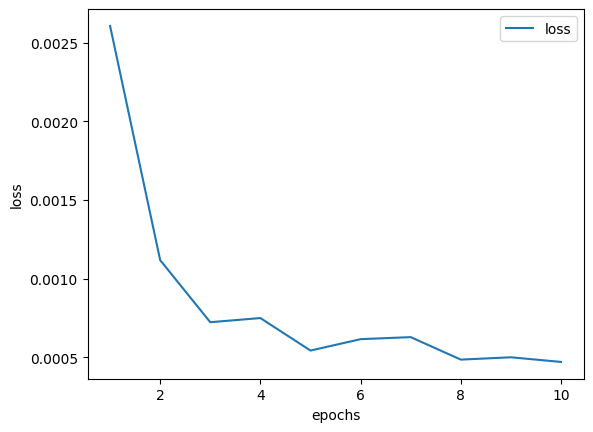

In [ ]:
# Let's plot the history of model_1 and see what's going on
historyForPlot = pd.DataFrame(history.history)
historyForPlot.index += 1 # we plus 1 to the number of indexing so our epochs Plot picture will be counting from 1 not 0.
historyForPlot.plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
# Train the model again with  6 epochs
# but first we need to create another model so we can compare them together

# building LSTM model_2
tf.random.set_seed(42)

model_2 = Sequential()
model_2.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1))) # we made it like pros ;) | the simple form is "input_shape(60, 1)
model_2.add(LSTM(50, return_sequences=False))
model_2.add(Dense(25))
model_2.add(Dense(1))

# Compile model_2
model_2.compile(optimizer='Adam', loss='mse')

# Fit model_2
history_2 = model_2.fit(x_train, y_train, batch_size=1, epochs=6)

Epoch 1/6
1694/1694 [==============================] - 57s 32ms/step - loss: 0.0027
Epoch 2/6
1694/1694 [==============================] - 54s 32ms/step - loss: 0.0011
Epoch 3/6
1694/1694 [==============================] - 54s 32ms/step - loss: 7.0195e-04
Epoch 4/6
1694/1694 [==============================] - 53s 31ms/step - loss: 7.4326e-04
Epoch 5/6
1694/1694 [==============================] - 52s 30ms/step - loss: 5.4031e-04
Epoch 6/6
1694/1694 [==============================] - 51s 30ms/step - loss: 5.7870e-04


In [ ]:
# Get the model_2 predicted price values
predictions_2 = model_2.predict(x_test)
predictions_2 = scaler.inverse_transform(predictions_2)
len(predictions_2)

14/14 [==============================] - 1s 23ms/step


438

In [ ]:
# Get the root mean squared error (RMSE) for model_2
rmse_2 = np.sqrt(np.mean(predictions_2 - y_test)**2)
rmse_2

1728.037639958048

<ipython-input-25-8f41bf5e5744>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_1['Predictions'] = predictions_1
<ipython-input-25-8f41bf5e5744>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_2['Predictions'] = predictions_2


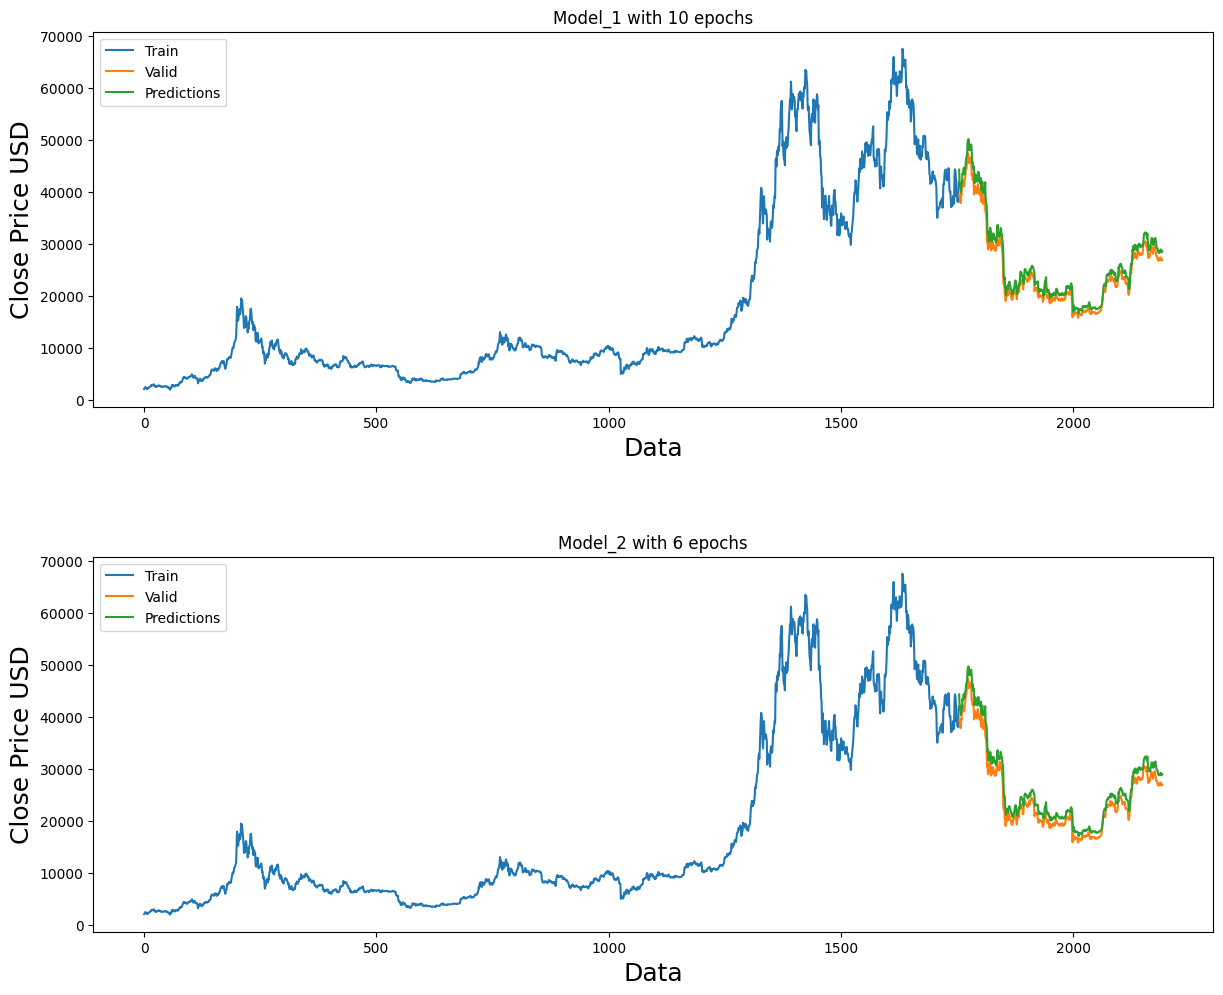

In [ ]:
# Plot the data
train = data[:training_data_len]

#data for model_1
valid_1 = data[training_data_len:]
valid_1['Predictions'] = predictions_1

# data for model_2
valid_2 = data[training_data_len:]
valid_2['Predictions'] = predictions_2

# Visualized the data
#model_1
plt.figure(figsize=(14, 10))
plt.subplot(2, 1, 1)
plt.title('Model_1 with 10 epochs')
plt.xlabel('Data', fontsize=18)
plt.ylabel('Close Price USD', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid_1[['Close', 'Predictions']])

plt.legend(['Train', 'Valid', 'Predictions'], loc='upper left')

#model_2
plt.subplot(2, 1, 2)
plt.title('Model_2 with 6 epochs')
plt.xlabel('Data', fontsize=18)
plt.ylabel('Close Price USD', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid_2[['Close', 'Predictions']])

plt.legend(['Train', 'Valid', 'Predictions'], loc='upper left')

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=1,
                    wspace=0.4,
                    hspace=0.4)
plt.show()

It seem's our model_1 has a better predictions than the model_2. So please keep in mind that never choose a model to use, without ploting the result ;)

Now it's time to predict a future day price which is not in train or test set. In other words we want to predict a price out of the dataframe which is the price of today.

So first we need to create a new variable last_60_days and use it to predict the today price of Bitcoin. This way we can create a new test set to creating the price of last 60 days from today (today is 05/22/2023).

In [ ]:
#Get the last 60 day closing price values and convert the datadrame to an array
last_60_days = data[-60:].values
# Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.fit_transform(last_60_days)
# create an empty list
new_X_test = []
# Append the past 60 days
new_X_test.append(last_60_days_scaled)
# Convert the X_test data set to a numpy array
new_X_test = np.array(new_X_test)
# Reshape the data
new_X_test = np.reshape(new_X_test, (new_X_test.shape[0], new_X_test.shape[1], 1))
# Get the predicted scaled price
pred_price = model_1.predict(new_X_test)
# Undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price,"USD")

1/1 [==============================] - 0s 216ms/step
[[26948.965]] USD
